In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Problem 2: A visual history of Nobel prize winners

In [41]:
# load the data
url = '../../../Data/nobel.csv'
nobel = pd.read_csv(url)

Display the first 10 rows.

In [42]:
nobel.head(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


## Part 1: who gets the Nobel Prize?

Count the number of rows (prizes) 

In [43]:
len(nobel)

969

Count the number of prizes, grouped by `sex`.

In [44]:
nobel.groupby('Sex')['Prize'].count()

Sex
Female     50
Male      893
Name: Prize, dtype: int64

Count the number of prizes, grouped by `Birth Country`. Arrange the result by no. prizes in descending order and display the first 20 rows.

In [45]:
nobel.groupby('Birth Country')['Prize'].count().sort_values(ascending=False).head(20)

Birth Country
United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Switzerland                  17
Austria                      15
Norway                       13
China                        12
Australia                    11
Denmark                      11
Germany (Poland)             10
Scotland                      9
Belgium                       9
South Africa                  9
Name: Prize, dtype: int64

## Part 2: USA dominance

Add a `usa_born_winner` column to the `nobel` DataFrame, where the value is `TRUE` when `Birth Country` is "United States of America".

In [46]:
nobel['usa_born_winner'] = nobel['Birth Country'] == 'United States of America'

Add a `decade` column to the `nobel` DataFrame showing the decade the prize was awarded (1953 should become 1950, for example).

In [47]:
# Hint: you can use Python floor division // to compute the decade of a year
# (1953//10)*10 = 1950
nobel['decade'] = (nobel['Year']//10)*10

Calculate the percentage of USA born winners for each decade.

In [48]:
usa_winners_percentage_decades = nobel.groupby(['decade'])['usa_born_winner'].value_counts(normalize=True).unstack() * 100

Plot the percentage of USA born winners per decade.

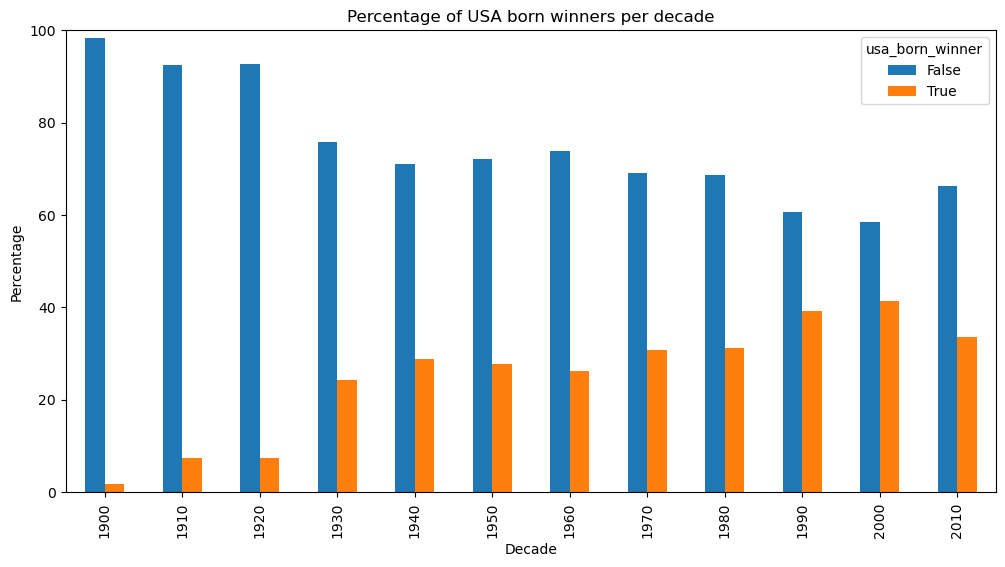

In [49]:
usa_winners_percentage_decades.plot(kind='bar', figsize=(12, 6))
plt.ylabel('Percentage')
plt.xlabel('Decade')
plt.title('Percentage of USA born winners per decade')
# y axis * 100
plt.ylim(0, 100)
plt.show()

## Part 3: What is the gender of a typical Nobel Prize winner?

Add a `female_winner` column, where the value is `TRUE` when `Sex` is 'Female'

In [50]:
nobel['female_winner'] = nobel['Sex'] == 'Female'

Calculate the percentage of female winners by decade and category.

In [51]:
female_decade_winners_percent = nobel.groupby(['decade', 'female_winner'])['Category'].value_counts(normalize=True).unstack() * 100
# replace nans with 0
female_decade_winners_percent.fillna(0, inplace=True)
female_decade_winners_percent
# drop rows where female_winner is False
female_decade_winners_percent = female_decade_winners_percent.xs(True, level='female_winner') # xs stands for cross-section
female_decade_winners_percent

Category,Chemistry,Economics,Literature,Medicine,Peace,Physics
decade,,,,,,
1900,0.000000,0.000000,33.333333,0.000000,33.333333,33.333333
1910,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1920,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000
1930,33.333333,0.000000,33.333333,0.000000,33.333333,0.000000
1940,0.000000,0.000000,33.333333,33.333333,33.333333,0.000000
1960,33.333333,0.000000,33.333333,0.000000,0.000000,33.333333
1970,0.000000,0.000000,0.000000,25.000000,75.000000,0.000000
1980,0.000000,0.000000,0.000000,75.000000,25.000000,0.000000
1990,0.000000,0.000000,42.857143,14.285714,42.857143,0.000000


Plot the percentage of female winners by decade and category.

<Axes: xlabel='decade'>

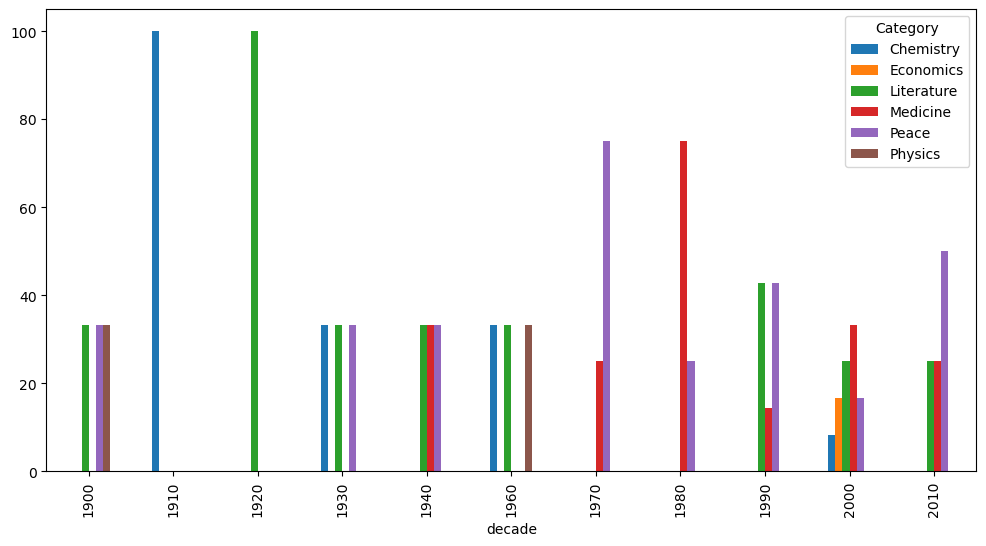

In [52]:
# Plot the percentage of female winners by decade and category.
female_decade_winners_percent.plot(kind='bar', figsize=(12, 6))

## Part 4: The first woman to win the Nobel Prize

Find the first woman to win a Nobel Prize.

In [53]:
nobel[nobel['female_winner'] == True].iloc[nobel['Year'].idxmin()]['Full Name']

'Marie Curie, née Sklodowska'

## Part 5: Repeat laureates

Use the `count` method to count the number of wins grouped by `Full Name`.

In [54]:
nobel.groupby('Full Name').count()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner
Full Name,,,,,,,,,,,,,,,,,,,,
A. Michael Spence,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1
Aage Niels Bohr,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Aaron Ciechanover,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1
Aaron Klug,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1
Abdus Salam,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Youyou Tu,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1
Yuan T. Lee,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1
Yves Chauvin,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## Part 6: How old are you when you get the prize?

Fix Albert John Lutuli and A. Michael Spence `Birth Date` values

In [59]:
nobel.loc[nobel['Full Name'].str.contains('Lutuli')]
nobel.loc[nobel['Full Name'].str.contains('Lutuli'), 'Birth Date'] = '1898-01-01'
nobel.loc[nobel['Full Name'].str.contains('Michael Spence')]
nobel.loc[nobel['Full Name'].str.contains('Michael Spence'), 'Birth Date'] = '1943-01-01'

Calculate how old people were when they got their prize. Assign the resulting Series to the `nobel_age` column.

In [60]:
nobel['nobel_age'] = nobel['Year'] - pd.to_datetime(nobel['Birth Date']).dt.year

Plot `nobel_age` as a function of `Year` as a scatter plot.

<Axes: xlabel='Year', ylabel='nobel_age'>

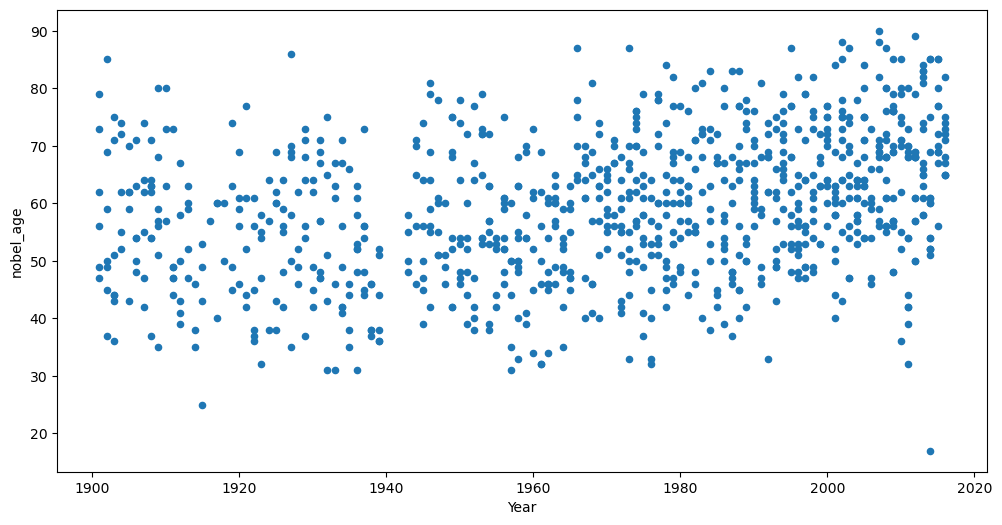

In [61]:
nobel.plot(kind='scatter', x='Year', y='nobel_age', figsize=(12, 6))

## Part 6: Oldest and youngest winners

Find the oldest winner.

In [62]:
nobel.loc[nobel['nobel_age'] == nobel['nobel_age'].max()][['Full Name', 'nobel_age']]

,Full Name,nobel_age
825,Leonid Hurwicz,90.0


Find the youngest winner.

In [63]:
nobel.loc[nobel['nobel_age'] == nobel['nobel_age'].min()][['Full Name', 'nobel_age']]

,Full Name,nobel_age
940,Malala Yousafzai,17.0
